# Dataset:
This is a template dataset in AIdea for Defect Classification of AOI.
Here is the link: <https://aidea-web.tw/>(AIdea).
## Data description:
The image data provided in this topic includes 6 categories (normal category + 5 defect categories)
Downloaded data aoi_data.zip contains:
-   train_images.zip: Image data (PNG format) required for training, a total of 2,528 images.
-   train.csv: contains 2 fields, ID and Label.
    -   ID: The file name of the image.
    -   Label: Defect classification category:
        -   0: normal
        -   1: void
        -   2: horizontal
        -   3: vertical defect
        -   4: edge defect
        -   5: particle
-   test_images.zip: Image data (PNG format) required for testing, a total of 10,142 images.
-   tets.csv: contain2 fields, ID and Label.
    -   ID: The file name of the image.
    -   Label: Defect classification category (its value can only be one of the following: 0,1,2,3,4,5)

In [121]:
# Step 1 Read the annotation file (CSV) to get the label and the path file to each image
# library: pandas
import pandas as pd
dir_aoi_data = "/Users/user/Victor2023/Dataset/aoi/train.csv"
df_train_csv = pd.read_csv(dir_aoi_data)


In [122]:
# Show the information of dataframe which is getting from train.csv file
df_train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      2528 non-null   object
 1   Label   2528 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 39.6+ KB


In [123]:
df_train_csv.head()

,ID,Label
0,train_00000.png,0
1,train_00001.png,1
2,train_00002.png,1
3,train_00003.png,5
4,train_00004.png,5


In [124]:
df_train_csv['Label'].value_counts()

Label
0    674
5    644
1    492
3    378
4    240
2    100
Name: count, dtype: int64

In [125]:
# Some metadata information:
n_samples_trainset = len(df_train_csv)
print(n_samples_trainset)

2528


In [126]:
df_train_csv['ID'][0]

'train_00000.png'

In [127]:
import os
train_dir = "/Users/user/Victor2023/Dataset/aoi/train_images"
list_full_path = []
for i in range(len(df_train_csv)):
    path_img = os.path.join(train_dir,df_train_csv['ID'][i])
    list_full_path.append(path_img)


In [128]:
list_full_path[0]

'/Users/user/Victor2023/Dataset/aoi/train_images/train_00000.png'

In [129]:
import numpy as np
from PIL import Image
X = np.array([np.array(Image.open(path_img)) for path_img in list_full_path])

In [130]:
print(X.shape)

(2528, 512, 512)


The size of image is 512 x 512

In [131]:
y = np.array(df_train_csv['Label'])

In [132]:
print(list_full_path[0])
print(y[0])

/Users/user/Victor2023/Dataset/aoi/train_images/train_00000.png
0


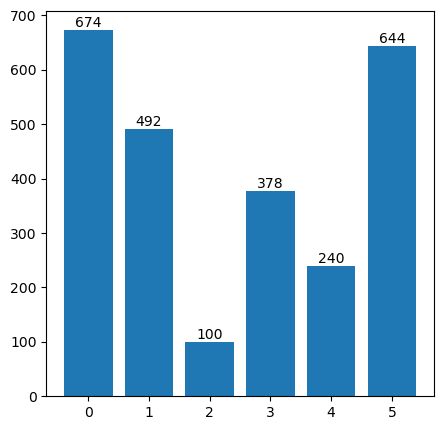

In [133]:
nb_classes = len(np.unique(y))
## Visual bar plot of number occurrences of each class:
import matplotlib.pyplot as plt
statistic_class = np.unique(y,return_counts=True)
categoricalClasses = [f'{C}' for C in statistic_class[0]]
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.bar(x = categoricalClasses, height = statistic_class[1],width = 0.8)
for i in range(nb_classes):
    ax.text(categoricalClasses[i],statistic_class[1][i],
            str(statistic_class[1][i]),ha='center',va = 'bottom')

In [134]:
Labels = ['normal', 'void', 'horizontal', 'vertical', 'edge', 'particle']

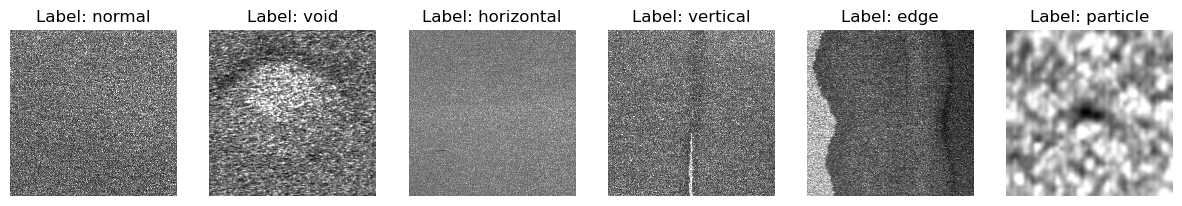

In [135]:
# Visualize one sample of each class
_, indices = np.unique(y,return_index=True) # get one index of each class
# Plot
_, axes = plt.subplots(nrows = 1,
                       ncols = len(indices),
                       figsize = (15,6))
for i in range(len(indices)):
    index = indices[i]
    axes[i].set_axis_off()
    axes[i].imshow(X[index], cmap = plt.cm.gray, interpolation= "nearest")
    axes[i].set_title(f"Label: {Labels[y[index]]}")
    

In [136]:
# Resize the image to small dimensional of width and height
def get_data(path_csv:str,
             root_img:str,
             width:int = 28,
             height:int = 28):
    """
    path_csv: The directory to the annotation csv file
    root_img: The root directory of images
    width: The width size which we want to resize to
    height: The height size which we want to resize to

    output: A np.array() with shape (N,h,w), where
        N is the number of image
        h is height
        w is width
    """
    df_csv = pd.read_csv(path_csv)
    data = []
    for i in range(len(df_csv)):
        path_img = os.path.join(root_img,df_csv['ID'][i])
        img = Image.open(path_img)
        img = img.resize(size=(width,height),
                         resample=Image.BICUBIC)
        data.append(np.array(img))
        
    return np.array(data),np.array(df_csv["Label"])
    

In [137]:
path_csv = "/Users/user/Victor2023/Dataset/aoi/train.csv"
root_img = "/Users/user/Victor2023/Dataset/aoi/train_images"
width = 8
height = 8
X,y = get_data(path_csv=path_csv,
               root_img=root_img,
               width=width,
               height=height)


In [138]:
n_samples = X.shape[0]

In [139]:
X = np.reshape(X,newshape=(n_samples,-1))

In [140]:
print(X.shape)

(2528, 64)


In [141]:
print(X.max())

255


## Working with some ml models

In [142]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from matplotlib import pyplot as plt

In [143]:
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(solver='lbfgs',max_iter=1000)
    models['knn'] = KNeighborsClassifier(n_neighbors=3)
    models['dtree'] = DecisionTreeClassifier(criterion='gini')
    models['svm'] = SVC(C=10,kernel='rbf')
    models['bayes'] = MultinomialNB()
    return models

In [144]:
def evaluate_model(model,X,y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
    scores = cross_val_score(model,X,y,
                             scoring='accuracy',
                             cv=cv,
                             n_jobs=1,
                             error_score='raise')
    return scores

Model name lr, mean of cv score: 0.6694308509525899, std of cv score: 0.0218044131564201
Model name knn, mean of cv score: 0.805501704414748, std of cv score: 0.025098992648123555
Model name dtree, mean of cv score: 0.8018225735617039, std of cv score: 0.026723930988908916
Model name svm, mean of cv score: 0.8975448062404585, std of cv score: 0.017092447432034582
Model name bayes, mean of cv score: 0.378558357906184, std of cv score: 0.014168479475774504


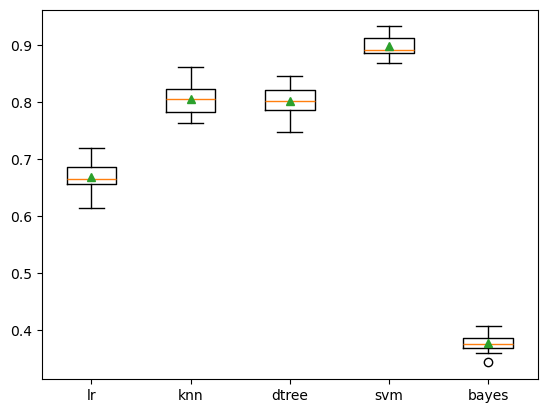

In [145]:
models = get_models()
# Evaluate the models and store results
results, names = list(),list()
for name, model in models.items():
    scores = evaluate_model(model,X/255,y)
    results.append(scores)
    names.append(name)
    print(f"Model name {name}, mean of cv score: {np.mean(scores)}, std of cv score: {np.std(scores)}")
plt.boxplot(results,labels=names,showmeans=True)
plt.show()

## Apply some dimensional reduction before fitting data to models

In [146]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    shuffle=False)

In [148]:
print(f'The number of sample in the data train set: {len(y_train)}')
print(f'The number of sample in the data test set: {len(y_test)}')

The number of sample in the data train set: 2022
The number of sample in the data test set: 506


In [149]:
pca = PCA(n_components=32, random_state=0)
pca.fit(X_train)

PCA(n_components=32, random_state=0)

In [150]:
X_train_transformed = pca.transform(X_train)
print(X_train_transformed.shape)

(2022, 32)


In [151]:
rbf_svc = SVC(C = 10, kernel='rbf')

In [152]:
rbf_svc.fit(X_train_transformed,y_train)

SVC(C=10)

In [153]:
X_test_transformed = pca.transform(X_test)

In [154]:
pred_test = rbf_svc.predict(X_test_transformed)

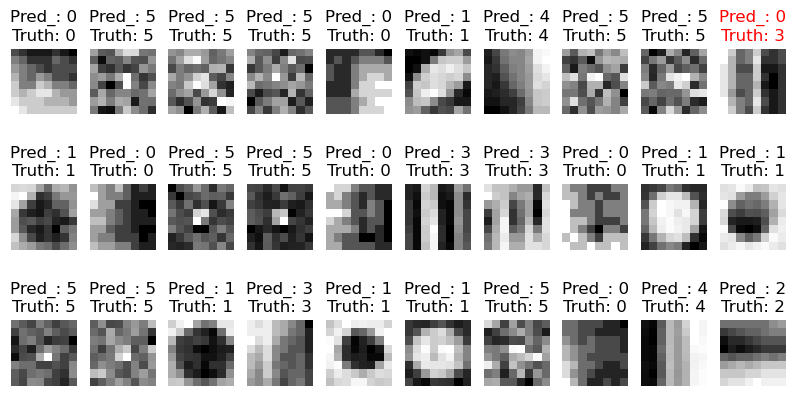

In [155]:
# Visualize the first 30 test samples and show their predicted digit value in the title.
_,axes = plt.subplots(nrows = 3,ncols = 10, figsize= (10,5))
for r in range(3):
    for c in range(10):
        index = r*10 + c
        axes[r,c].set_axis_off()
        image = X_test[index].reshape((8,8))
        pred_label = pred_test[index]
        true_label = y_test[index]
        axes[r,c].imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
        if pred_label == true_label:
            axes[r,c].set_title(f"Pred_: {pred_label}\nTruth: {true_label}")
        else:
            axes[r,c].set_title(f"Pred_: {pred_label}\nTruth: {true_label}",color = 'red')

In [156]:
# Classification report:
from sklearn import metrics
print(f"Classification report for classifier {rbf_svc}:\n"
      f"{metrics.classification_report(y_test,pred_test,digits=4)}\n")

Classification report for classifier SVC(C=10):
              precision    recall  f1-score   support

           0     0.7987    1.0000    0.8881       127
           1     0.9468    0.9271    0.9368        96
           2     0.9091    1.0000    0.9524        20
           3     0.8958    0.5658    0.6935        76
           4     0.9808    0.9623    0.9714        53
           5     1.0000    0.9776    0.9887       134

    accuracy                         0.9111       506
   macro avg     0.9219    0.9055    0.9052       506
weighted avg     0.9181    0.9111    0.9060       506




Confusion matrix:
[[127   0   0   0   0   0]
 [  1  89   2   4   0   0]
 [  0   0  20   0   0   0]
 [ 30   2   0  43   1   0]
 [  1   1   0   0  51   0]
 [  0   2   0   1   0 131]]


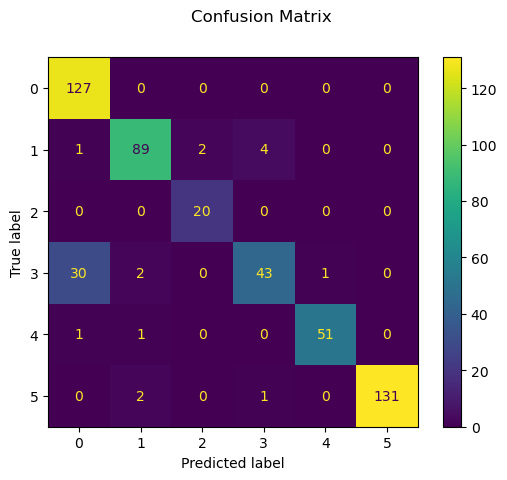

In [157]:
# Confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,pred_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [158]:
pca_2 = PCA(n_components=2, random_state=0)
pca_2.fit(X_train)
pca_2_results = pca_2.transform(X_train)

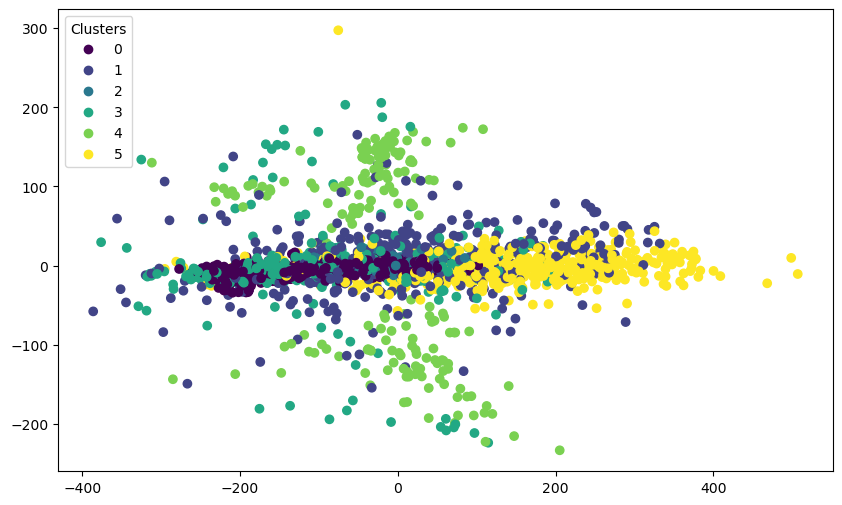

In [159]:
# Visualize results:

fig,ax = plt.subplots(1,1,figsize = (10,6))
scatter = ax.scatter(pca_2_results[:,0],pca_2_results[:,1],c = y_train)

ax.legend(*scatter.legend_elements(),loc = 'upper left',title="Clusters")